## Dividend Payout Ratio Analysis for Hong Kong and Japan

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('international_dividend_2022.xlsx', sheet_name='Sheet1')
df.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,0.0,-25.043,36,Australia
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,0.0,-93.479,36,Australia
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,0.0,-21.670,36,Australia
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,0.0,-6.018,36,Australia
4,C036ABF00,2006,791.512,98.479,NaN,366.944,1.214,178.487,598.169,8.828,-41.544,-23.038,107.006,623.727,NaN,-35.414,36,Australia


In [4]:
#Number of rows and columns
df.shape

(148015, 18)

## Data Pre-processing

In [5]:
df1=df.dropna(subset=['EBIT', 'MKT_EQUITY', 'BOOK_EQUITY','TA','SALES_USD','INTEREST'])

In [6]:
df1.shape

(133751, 18)

In [7]:
df2=df1.drop_duplicates()

In [8]:
# Check the number of rows and columns after deleting duplicates
df2.shape

(133751, 18)

In [9]:
#Rename the year variable from 'year' to 'Year'
df2=df2.rename(columns = {'year':'Year'})
df2

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,0.000,-25.043,36,Australia
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,0.000,-93.479,36,Australia
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,0.000,-21.670,36,Australia
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,0.000,-6.018,36,Australia
5,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,-89.595,-55.479,142.521,819.914,0.000,-81.811,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148010,C82699850,2013,255.161,461.951,852.480,148.526,0.000,0.000,19.104,0.000,43.146,81.338,73.019,422.452,30.475,31.817,826,UK
148011,C82699850,2014,254.385,428.367,912.273,151.499,0.000,0.000,20.401,0.000,39.090,77.160,76.756,396.238,31.244,29.130,826,UK
148012,C82699850,2015,267.090,435.811,766.491,153.450,0.000,0.000,23.203,0.000,39.085,78.674,78.314,393.939,31.655,29.522,826,UK
148013,C82699850,2016,294.319,409.292,883.209,165.077,0.000,0.000,20.570,0.000,48.820,89.331,95.152,362.910,32.493,35.754,826,UK


In [10]:
pd.set_option('display.float_format', '{:.3f}'.format)

df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,133751.000,2011.264,6.085,2001.000,2006.000,2011.000,2017.000,2021.000
TA,133751.000,325150.249,4658978.532,5.068,742.576,9125.661,45966.500,359335527.000
SALES_USD,133751.000,1720.507,8948.220,10.002,65.648,203.376,728.745,476914.936
MKT_EQUITY,133751.000,73183.893,439241.750,0.000,484.272,4031.827,20731.499,26379738.669
BOOK_EQUITY,133751.000,54944.014,352856.935,-1724788.000,321.702,3745.000,19922.825,23404547.000
ST_DEBT,132099.000,34579.647,660772.383,0.000,6.287,371.275,3601.074,71618334.000
LT_DEBT,133279.000,36851.492,388104.251,-20398.000,3.354,290.246,3286.103,31679355.000
NPPE,131634.000,45128.743,312115.802,0.000,82.025,1829.912,11809.750,12567459.000
INTEREST,133751.000,889.002,10267.095,0.000,1.800,19.800,131.709,958000.000
EBIT,133751.000,6851.268,57905.563,-2036119.000,7.396,283.703,1996.253,5977706.000


In [11]:
# X varibles or explanatory variables
df2['Tangibility']=df2['NPPE']/df2['TA']
df2['Market_to_book']= (df2['TA'] + df2['MKT_EQUITY'] - df2['BOOK_EQUITY']) /df2['TA']
df2['Logsale'] = np.log(df2['TA'])
df2['Profitability']=df2['EBITDA']/df2['TA']

# Calculating dividend payout ratio
df2['DPR']= df['DIVIDEND']/ df['NET_INCOME']

In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,133751.000,2011.264,6.085,2001.000,2006.000,2011.000,2017.000,2021.000
TA,133751.000,325150.249,4658978.532,5.068,742.576,9125.661,45966.500,359335527.000
SALES_USD,133751.000,1720.507,8948.220,10.002,65.648,203.376,728.745,476914.936
MKT_EQUITY,133751.000,73183.893,439241.750,0.000,484.272,4031.827,20731.499,26379738.669
BOOK_EQUITY,133751.000,54944.014,352856.935,-1724788.000,321.702,3745.000,19922.825,23404547.000
ST_DEBT,132099.000,34579.647,660772.383,0.000,6.287,371.275,3601.074,71618334.000
LT_DEBT,133279.000,36851.492,388104.251,-20398.000,3.354,290.246,3286.103,31679355.000
NPPE,131634.000,45128.743,312115.802,0.000,82.025,1829.912,11809.750,12567459.000
INTEREST,133751.000,889.002,10267.095,0.000,1.800,19.800,131.709,958000.000
EBIT,133751.000,6851.268,57905.563,-2036119.000,7.396,283.703,1996.253,5977706.000


In [13]:
df2

,ws_num,Year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,Tangibility,Market_to_book,Logsale,Profitability,DPR
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,...,95.218,0.000,-25.043,36,Australia,0.669,0.949,4.770,-0.107,-0.000
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,...,31.992,0.000,-93.479,36,Australia,0.198,3.581,3.639,-2.275,-0.000
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,...,39.226,0.000,-21.670,36,Australia,0.182,3.116,3.600,-0.432,-0.000
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,...,10.955,0.000,-6.018,36,Australia,0.064,3.388,2.371,-0.228,-0.000
5,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,...,819.914,0.000,-81.811,36,Australia,0.746,1.049,6.840,-0.059,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148010,C82699850,2013,255.161,461.951,852.480,148.526,0.000,0.000,19.104,0.000,...,422.452,30.475,31.817,826,UK,0.075,3.759,5.542,0.319,0.958
148011,C82699850,2014,254.385,428.367,912.273,151.499,0.000,0.000,20.401,0.000,...,396.238,31.244,29.130,826,UK,0.080,3.991,5.539,0.303,1.073
148012,C82699850,2015,267.090,435.811,766.491,153.450,0.000,0.000,23.203,0.000,...,393.939,31.655,29.522,826,UK,0.087,3.295,5.588,0.295,1.072
148013,C82699850,2016,294.319,409.292,883.209,165.077,0.000,0.000,20.570,0.000,...,362.910,32.493,35.754,826,UK,0.070,3.440,5.685,0.304,0.909


In [14]:
#keeping variables of interest
df3 = df2[["Tangibility", "Market_to_book", "Year", "Logsale", "Profitability", "DPR", "COUNTRY"]]

In [15]:

df3

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR,COUNTRY
0,0.669,0.949,2009,4.770,-0.107,-0.000,Australia
1,0.198,3.581,2010,3.639,-2.275,-0.000,Australia
2,0.182,3.116,2011,3.600,-0.432,-0.000,Australia
3,0.064,3.388,2012,2.371,-0.228,-0.000,Australia
5,0.746,1.049,2007,6.840,-0.059,-0.000,Australia
...,...,...,...,...,...,...,...
148010,0.075,3.759,2013,5.542,0.319,0.958,UK
148011,0.080,3.991,2014,5.539,0.303,1.073,UK
148012,0.087,3.295,2015,5.588,0.295,1.072,UK
148013,0.070,3.440,2016,5.685,0.304,0.909,UK


In [16]:
df_hk = df3[df3['COUNTRY'] == 'Hong Kong']
df_hk

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR,COUNTRY
15000,0.046,1.519,2001,7.260,0.164,0.107,Hong Kong
15001,0.044,0.976,2002,7.492,0.106,0.341,Hong Kong
15002,0.044,0.834,2003,7.557,0.070,0.351,Hong Kong
15003,0.044,0.820,2004,7.688,0.068,0.000,Hong Kong
15004,0.020,0.837,2005,7.814,0.034,1.145,Hong Kong
...,...,...,...,...,...,...,...
40439,0.529,1.270,2017,7.879,0.091,0.178,Hong Kong
40440,0.559,1.160,2018,7.904,0.064,0.295,Hong Kong
40441,0.581,1.060,2019,7.973,0.102,0.379,Hong Kong
40442,0.508,0.932,2020,8.082,0.023,1.124,Hong Kong


In [17]:
df_jp = df3[df3['COUNTRY'] == 'Japan']
df_jp

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR,COUNTRY
40444,0.076,5.740,2006,7.384,0.297,0.036,Japan
40446,0.100,5.089,2002,8.703,-0.210,-0.000,Japan
40447,0.077,4.182,2003,8.937,-0.028,-0.000,Japan
40448,0.069,12.627,2004,9.259,0.137,0.000,Japan
40449,0.054,23.963,2005,9.513,0.199,0.000,Japan
...,...,...,...,...,...,...,...
121046,0.028,1.039,2006,14.377,0.053,0.495,Japan
121047,0.030,1.131,2007,14.275,-0.261,-0.067,Japan
121048,0.034,0.897,2008,14.147,0.024,2.045,Japan
121049,0.047,0.909,2009,13.773,-0.216,-0.064,Japan


In [18]:
df_hk = df_hk.dropna()

In [19]:
df_jp = df_jp.dropna()

In [20]:
df_hk.shape

(20991, 7)

In [21]:
df_jp.shape

(74150, 7)

In [22]:
# Hong Kong descriptive statistics
#we will transpose the descriptive statistics by df_hk.describe().T

pd.set_option('display.float_format', '{:.3f}'.format)
df_hk[["Tangibility", "Market_to_book", "Logsale", "Profitability", "DPR"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,20991.000,0.234,0.227,0.000,0.044,0.165,0.366,0.995
Market_to_book,20991.000,1.512,3.961,0.078,0.770,1.014,1.515,426.715
Logsale,20991.000,7.923,1.958,4.357,6.491,7.651,9.073,16.955
Profitability,20991.000,0.045,0.350,-16.298,0.015,0.065,0.120,13.951
DPR,20991.000,0.328,4.100,-314.579,0.000,0.000,0.347,328.750


In [23]:
# Japan descriptive statistics
#we will transpose the descriptive statistics by df_hk.describe().T

pd.set_option('display.float_format', '{:.3f}'.format)
df_jp[["Tangibility", "Market_to_book", "Logsale", "Profitability", "DPR"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,74150.000,0.282,0.203,0.000,0.120,0.259,0.403,0.982
Market_to_book,74150.000,1.279,1.884,0.193,0.831,0.987,1.246,331.551
Logsale,74150.000,10.639,1.832,6.716,9.366,10.373,11.601,19.700
Profitability,74150.000,0.075,0.213,-3.867,0.040,0.074,0.113,47.038
DPR,74150.000,inf,NaN,-149.309,0.000,0.204,0.370,inf


### Boxplott for Dividend Payour ration for Japan and Hong Kong

In [24]:
# To remove outliers, we will cap the variables at top and bottom 1% (at 0.01 and 0.99 quantiles)
df_hk1=df_hk.loc[:, df_hk.columns != 'COUNTRY']
df_hk1=df_hk1.dropna()
df_hk1 = df_hk1.clip(lower=df_hk1.quantile(0.01), upper=df_hk1.quantile(0.99), axis=1)

df_hk1.head()

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
15000,0.046,1.519,2001,7.260,0.164,0.107
15001,0.044,0.976,2002,7.492,0.106,0.341
15002,0.044,0.834,2003,7.557,0.070,0.351
15003,0.044,0.820,2004,7.688,0.068,0.000
15004,0.020,0.837,2005,7.814,0.034,1.145


In [25]:
# To remove outliers, we will cap the variables at top and bottom 1% (at 0.01 and 0.99 quantiles)
df_jp1=df_jp.loc[:, df_jp.columns != 'COUNTRY']
df_jp1=df_jp1.dropna()
df_jp1 = df_jp1.clip(lower=df_jp1.quantile(0.01), upper=df_jp1.quantile(0.99), axis=1)

df_jp1.head()

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
40444,0.076,5.740,2006,7.415,0.291,0.036
40446,0.100,5.089,2002,8.703,-0.210,-0.000
40447,0.077,4.182,2003,8.937,-0.028,-0.000
40448,0.069,6.493,2004,9.259,0.137,0.000
40449,0.054,6.493,2005,9.513,0.199,0.000


In [26]:

df_hk.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
0.000,0.000,0.078,2001.000,4.357,-16.298,-314.579
0.010,0.001,0.328,2001.000,4.647,-0.655,-1.156
0.250,0.044,0.770,2008.000,6.491,0.015,0.000
0.500,0.165,1.014,2014.000,7.651,0.065,0.000
0.750,0.366,1.515,2018.000,9.073,0.120,0.347
0.990,0.906,8.270,2021.000,13.420,0.363,4.271
1.000,0.995,426.715,2021.000,16.955,13.951,328.750


In [27]:
df_jp.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
0.000,0.000,0.193,2001.000,6.716,-3.867,-149.309
0.010,0.003,0.467,2001.000,7.415,-0.219,-1.547
0.250,0.120,0.831,2006.000,9.366,0.040,0.000
0.500,0.259,0.987,2011.000,10.373,0.074,0.204
0.750,0.403,1.246,2016.000,11.601,0.113,0.370
0.990,0.870,6.493,2021.000,15.849,0.291,4.250
1.000,0.982,331.551,2021.000,19.700,47.038,NaN


In [28]:
# Replacing the outliers
df_hk1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
0.000,0.001,0.328,2001.000,4.647,-0.655,-1.156
0.010,0.001,0.328,2001.000,4.647,-0.655,-1.156
0.250,0.044,0.770,2008.000,6.491,0.015,0.000
0.500,0.165,1.014,2014.000,7.651,0.065,0.000
0.750,0.366,1.515,2018.000,9.073,0.120,0.347
0.990,0.906,8.264,2021.000,13.420,0.363,4.271
1.000,0.906,8.270,2021.000,13.420,0.363,4.271


In [29]:
df_jp1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
0.000,0.003,0.467,2001.000,7.415,-0.219,-1.547
0.010,0.003,0.467,2001.000,7.415,-0.219,-1.547
0.250,0.120,0.831,2006.000,9.366,0.040,0.000
0.500,0.259,0.987,2011.000,10.373,0.074,0.204
0.750,0.403,1.246,2016.000,11.601,0.113,0.370
0.990,0.870,6.493,2021.000,15.848,0.291,4.250
1.000,0.870,6.493,2021.000,15.849,0.291,4.250


In [30]:
# Hong Kong Descriptive analysis
df_hk1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,20991.000,0.234,0.226,0.001,0.044,0.165,0.366,0.906
Market_to_book,20991.000,1.394,1.213,0.328,0.770,1.014,1.515,8.270
Year,20991.000,2012.996,6.043,2001.000,2008.000,2014.000,2018.000,2021.000
Logsale,20991.000,7.917,1.928,4.647,6.491,7.651,9.073,13.420
Profitability,20991.000,0.051,0.143,-0.655,0.015,0.065,0.120,0.363
DPR,20991.000,0.263,0.634,-1.156,0.000,0.000,0.347,4.271


In [31]:
# Japan Descriptive analysis
df_jp1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,74150.000,0.281,0.201,0.003,0.120,0.259,0.403,0.870
Market_to_book,74150.000,1.225,0.869,0.467,0.831,0.987,1.246,6.493
Year,74150.000,2011.018,6.062,2001.000,2006.000,2011.000,2016.000,2021.000
Logsale,74150.000,10.633,1.799,7.415,9.366,10.373,11.601,15.849
Profitability,74150.000,0.076,0.074,-0.219,0.040,0.074,0.113,0.291
DPR,74150.000,0.293,0.635,-1.547,0.000,0.204,0.370,4.250


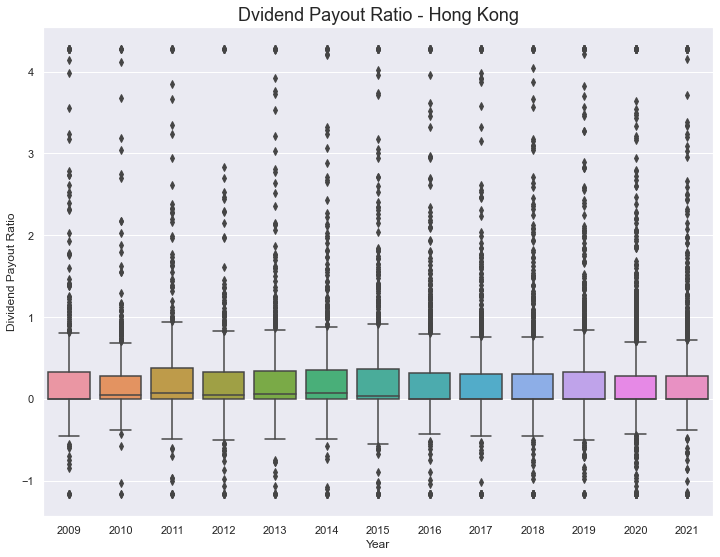

In [32]:
#Boxplot
df_hk2= df_hk1[(df_hk1['Year'] >= 2009)]
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 9)
    sns.boxplot("Year","DPR",data=df_hk2,ax=ax)
    
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Dividend Payout Ratio', fontsize=12)
    ax.set_title('Dvidend Payout Ratio - Hong Kong', fontsize=18)

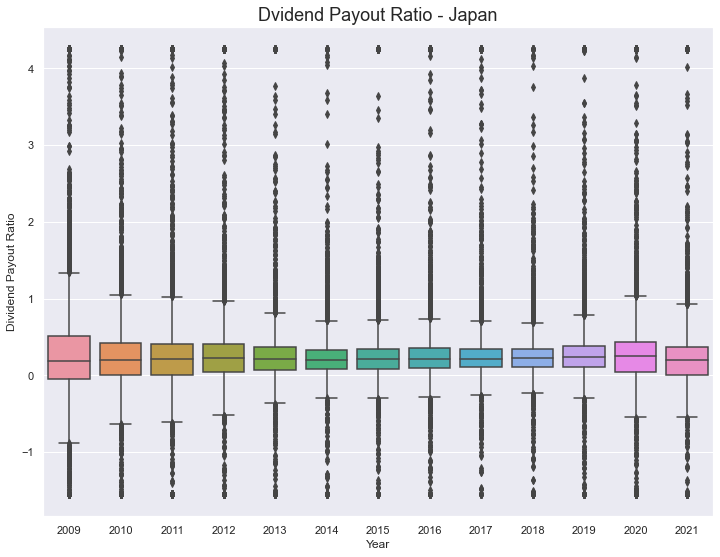

In [33]:
#Boxplot
df_jp2= df_jp1[(df_jp1['Year'] >= 2009)]
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 9)
    sns.boxplot("Year","DPR",data=df_jp2,ax=ax)
    
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Dividend Payout Ratio', fontsize=12)
    ax.set_title('Dvidend Payout Ratio - Japan', fontsize=18)

### Violinplot

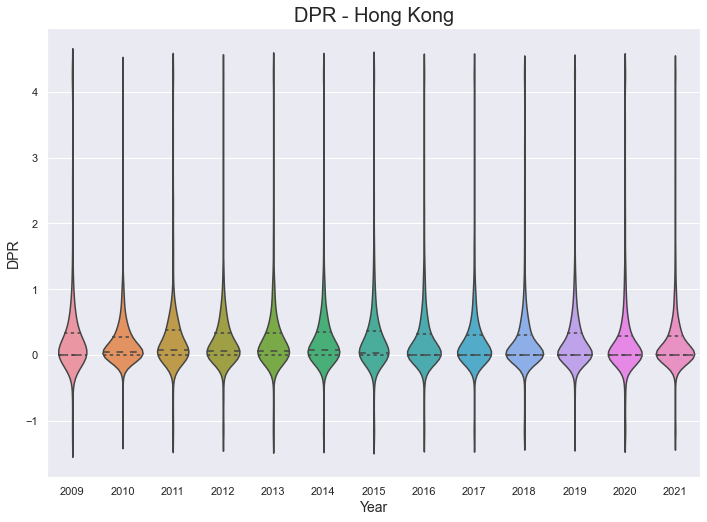

In [34]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.violinplot("Year","DPR",data=df_hk2,split='True', inner="quartile",ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('DPR', fontsize=14)
    ax.set_title('DPR - Hong Kong', fontsize=20)

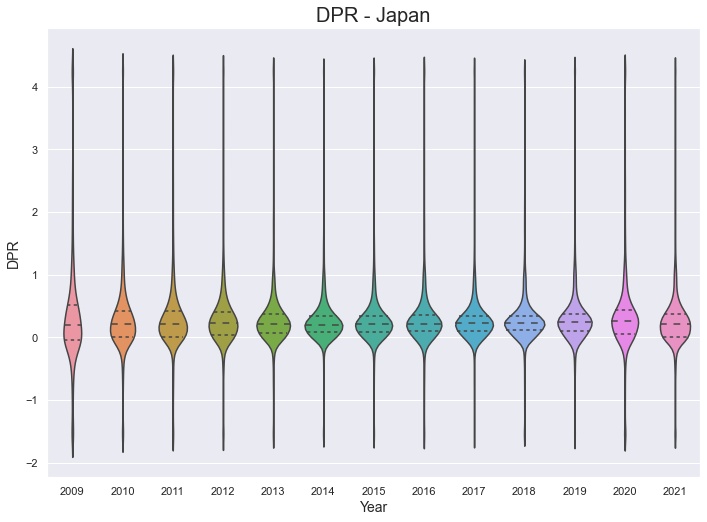

In [35]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.violinplot("Year","DPR",data=df_jp2,split='True', inner="quartile",ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('DPR', fontsize=14)
    ax.set_title('DPR - Japan', fontsize=20)

In [36]:
#Distribution of DPR over time for Hong Kong

g_df1 = df_hk1[['Year', 'DPR']]

g_df1 = g_df1.groupby('Year')

quantiles = g_df1['DPR'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_df1['DPR'].agg(['mean'])

data_combined=pd.concat([quantiles, mean], 1)
data_stacked=data_combined.stack().reset_index(name='DPR').rename(columns={'level_1': 'Quantiles and Mean'})
 
data_stacked

,Year,Quantiles and Mean,DPR
0,2001,0.100,0.000
1,2001,0.250,0.000
2,2001,0.500,0.000
3,2001,0.750,0.425
4,2001,0.900,0.788
...,...,...,...
121,2021,0.250,-0.000
122,2021,0.500,-0.000
123,2021,0.750,0.288
124,2021,0.900,0.660


In [37]:
# Distribution of DPR over time for Japan
g_df1 = df_jp1[['Year', 'DPR']]

g_df1 = g_df1.groupby('Year')

quantiles = g_df1['DPR'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_df1['DPR'].agg(['mean'])

data_combined=pd.concat([quantiles, mean], 1)
data_stacked1=data_combined.stack().reset_index(name='DPR').rename(columns={'level_1': 'Quantiles and Mean'})
 
data_stacked1

,Year,Quantiles and Mean,DPR
0,2001,0.100,-0.149
1,2001,0.250,-0.000
2,2001,0.500,0.152
3,2001,0.750,0.351
4,2001,0.900,0.756
...,...,...,...
121,2021,0.250,-0.000
122,2021,0.500,0.204
123,2021,0.750,0.370
124,2021,0.900,0.630


## Plot the Distribution of DPR over time using Catplot

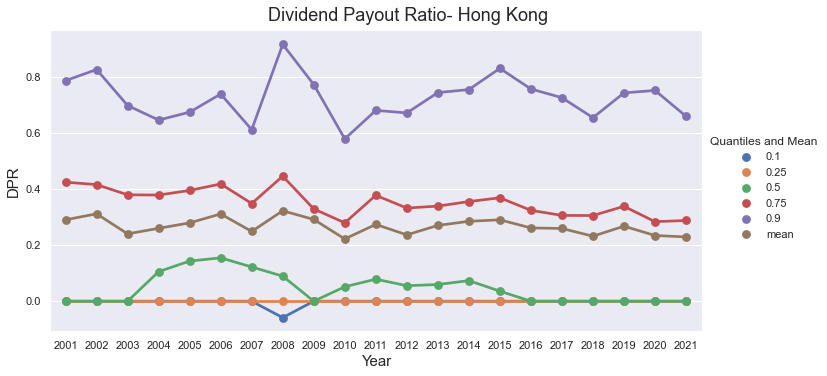

In [38]:
# Distribution of DPR for Hong Kong
ax = sns.catplot(x="Year", y='DPR', hue="Quantiles and Mean", kind="point", data=data_stacked, 
        height=5, 
        aspect=2); 

ax.fig.suptitle('Dividend Payout Ratio- Hong Kong',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('DPR', fontsize=15);

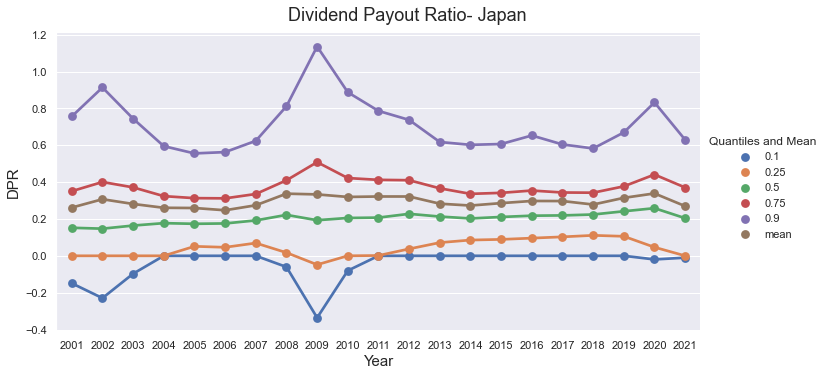

In [39]:
# Distribution of DPR for Japan
ax = sns.catplot(x="Year", y='DPR', hue="Quantiles and Mean", kind="point", data=data_stacked1, 
        height=5, 
        aspect=2); 

ax.fig.suptitle('Dividend Payout Ratio- Japan',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('DPR', fontsize=15);

### Analysis of determinants of DPR

### The relationship between Tangibility and DPR, Profitability and DPR and Firm size and DPR in the year 2021


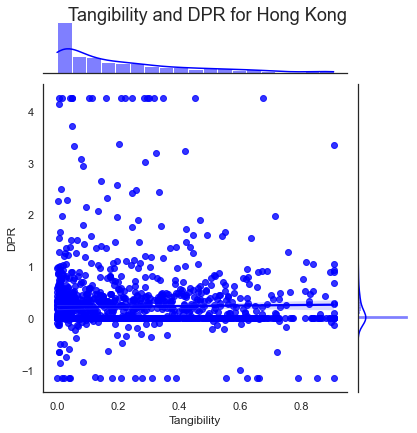

In [40]:
#Determinants for DPR for Hong Kong
df_hk_2021 = df_hk1[df_hk1['Year']==2021]

#using jointplot()
with sns.axes_style('white'):
    p = sns.jointplot("Tangibility","DPR", data=df_hk_2021, kind='reg',color='blue')
    p.fig.suptitle("Tangibility and DPR for Hong Kong",fontsize=18,y=1)
    
    plt.xlabel('Tangibility', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.show()

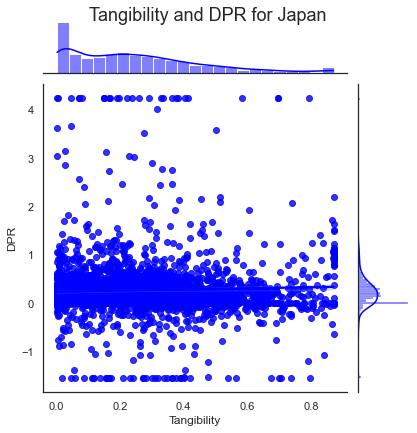

In [41]:
#Determinants for DPR for Japan
df_jp_2021 = df_jp1[df_jp1['Year']==2021]

#using jointplot()
with sns.axes_style('white'):
    p = sns.jointplot("Tangibility","DPR", data=df_jp_2021, kind='reg',color='blue')
    p.fig.suptitle("Tangibility and DPR for Japan",fontsize=18,y=1)
    
    plt.xlabel('Tangibility', fontsize=13)
    plt.ylabel('DPR', fontsize=13)
    plt.show()

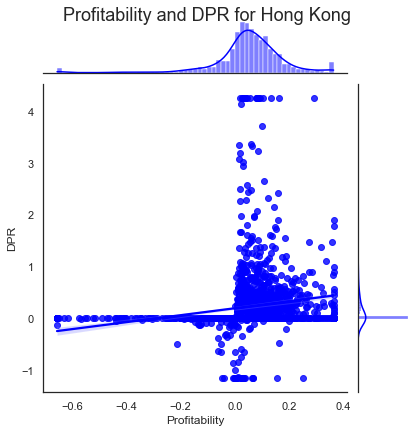

In [42]:
# Select the observations for 2021
df_hk_2021 = df_hk1[df_hk1['Year']==2021]

# Plot using jointplot()
with sns.axes_style('white'):
    p = sns.jointplot("Profitability","DPR", data=df_hk_2021, kind='reg',color='blue')
    p.fig.suptitle("Profitability and DPR for Hong Kong",fontsize=18,y=1)
    
    plt.xlabel('Profitability', fontsize=14)
    plt.ylabel('DPR', fontsize=14)
    plt.show()

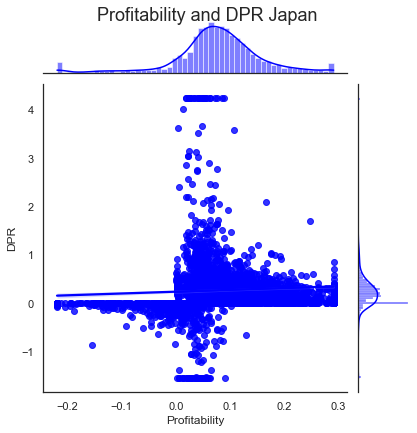

In [43]:
# Select the observations for 2021
df_jp_2021 = df_jp1[df_jp1['Year']==2021]

# Plot using jointplot()
with sns.axes_style('white'):
    p = sns.jointplot("Profitability","DPR", data=df_jp_2021, kind='reg',color='blue')
    p.fig.suptitle("Profitability and DPR Japan",fontsize=18,y=1)
    
    plt.xlabel('Profitability', fontsize=14)
    plt.ylabel('DPR', fontsize=14)
    plt.show()

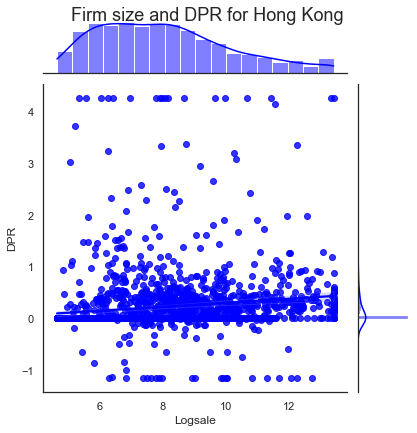

In [44]:
df_hk_2021 = df_hk1[df_hk1['Year'] == 2021]

with sns.axes_style('white'):
    p = sns.jointplot("Logsale","DPR", data=df_hk_2021, kind='reg',color='blue')

    p.fig.suptitle("Firm size and DPR for Hong Kong",fontsize=18,y=1)
    
    plt.xlabel('Firm size (log of sales)', fontsize=14)
    plt.ylabel('DPR', fontsize=14)
    
     
    plt.show()

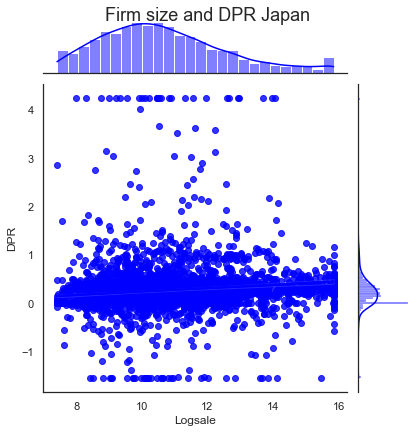

In [45]:
df_jp_2021 = df_jp1[df_jp1['Year'] == 2021]

with sns.axes_style('white'):
    p = sns.jointplot("Logsale","DPR", data=df_jp_2021, kind='reg',color='blue')

    p.fig.suptitle("Firm size and DPR Japan",fontsize=18,y=1)
    
    plt.xlabel('Firm size (log of sales)', fontsize=14)
    plt.ylabel('DPR', fontsize=14)
    
     
    plt.show()

## Regression and Scatter Plot using LinearRegression

Getting a scatter plot and regression line from LinearRegression from ScikitLearn library

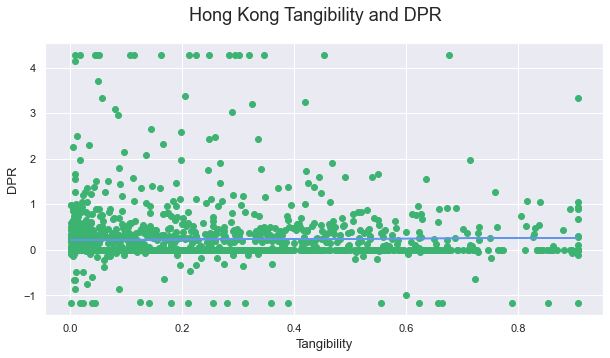

In [46]:
from sklearn.linear_model import LinearRegression

X = df_hk_2021["Tangibility"].values.reshape(-1, 1)  
Y = df_hk_2021["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')

plt.suptitle("Hong Kong Tangibility and DPR", fontsize=18);
plt.xlabel('Tangibility', fontsize=13)
plt.ylabel('DPR', fontsize=13)
plt.show()

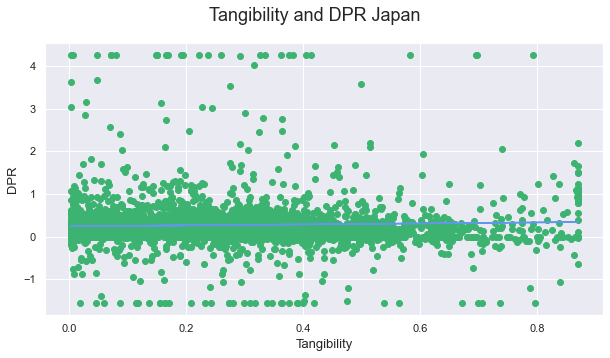

In [47]:
from sklearn.linear_model import LinearRegression

X = df_jp_2021["Tangibility"].values.reshape(-1, 1)  
Y = df_jp_2021["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')

plt.suptitle("Tangibility and DPR Japan", fontsize=18);
plt.xlabel('Tangibility', fontsize=13)
plt.ylabel('DPR', fontsize=13)
plt.show()

## Correlation analysis and heatmap of the correlation matrix

In [48]:
CorrMatrix = df_hk1.corr()

In [49]:
CorrMatrix1 = df_jp1.corr()

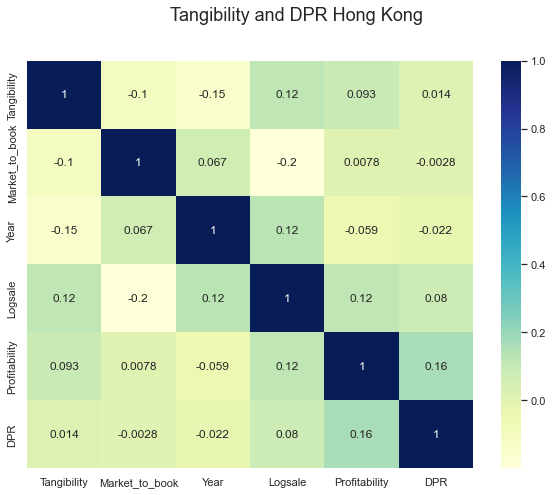

In [50]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix,annot=True,cmap="YlGnBu")
plt.suptitle('Tangibility and DPR Hong Kong', fontsize=18)
plt.show()

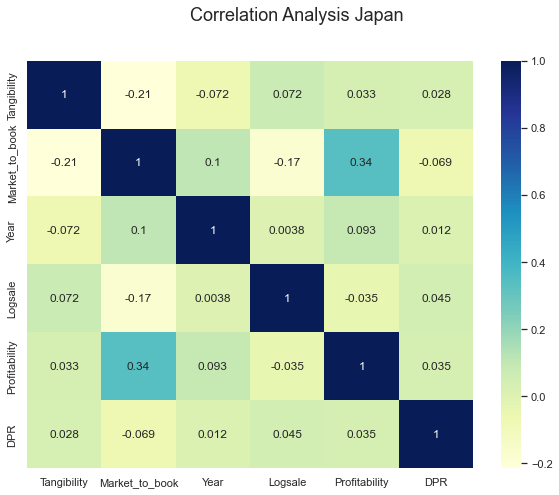

In [51]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix1,annot=True,cmap="YlGnBu")
plt.suptitle('Correlation Analysis Japan', fontsize=18)
plt.show()

## Kernet Density and Histogram Analysis

## Compare the distribution of DPR in 2009 and 2018 using distplot()

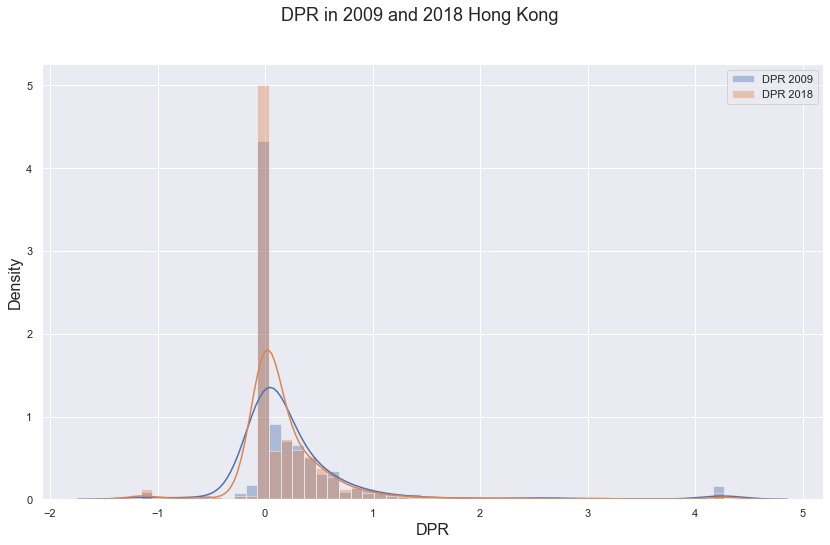

In [52]:
df_hk_2009 = df_hk1[df_hk1['Year'] == 2009]
df_hk_2018 = df_hk1[df_hk1['Year'] == 2018]

plt.figure(figsize=(14,8))
plt.xlabel('DPR', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.suptitle("DPR in 2009 and 2018 Hong Kong",fontsize=18)

sns.distplot(df_hk_2009["DPR"].values, label="DPR 2009");
sns.distplot(df_hk_2018["DPR"].values, label="DPR 2018");
plt.legend()
plt.show()

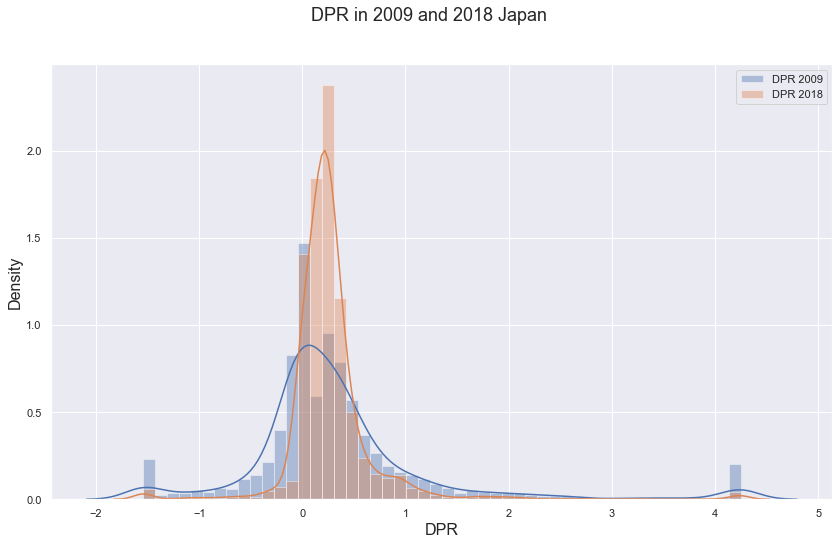

In [53]:
df_jp_2009 = df_jp1[df_jp1['Year'] == 2009]
df_jp_2018 = df_jp1[df_jp1['Year'] == 2018]

plt.figure(figsize=(14,8))
plt.xlabel('DPR', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.suptitle("DPR in 2009 and 2018 Japan",fontsize=18)

sns.distplot(df_jp_2009["DPR"].values, label="DPR 2009");
sns.distplot(df_jp_2018["DPR"].values, label="DPR 2018");
plt.legend()
plt.show()

## Regression Analysis

### Using the ordinary least squares method (statsmodels) to get the relation between firm characteristics 

### Regression on our data for Hong Kong

In [54]:
import statsmodels.formula.api as sm

result = sm.ols(formula="DPR ~ Tangibility + Market_to_book + Logsale + Profitability", data=df_hk1).fit()
print(result.params)

Intercept         0.060
Tangibility      -0.021
Market_to_book    0.004
Logsale           0.021
Profitability     0.701
dtype: float64


In [55]:
import statsmodels.formula.api as sm

result1 = sm.ols(formula="DPR ~ Tangibility + Market_to_book + Logsale + Profitability", data=df_jp1).fit()
print(result1.params)

Intercept         0.200
Tangibility       0.018
Market_to_book   -0.061
Logsale           0.011
Profitability     0.545
dtype: float64


In [56]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    DPR   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          1.31e-141
Time:                        15:27:07   Log-Likelihood:                -19882.
No. Observations:               20991   AIC:                         3.977e+04
Df Residuals:                   20986   BIC:                         3.981e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0600      0.020      2.

In [57]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    DPR   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          2.91e-153
Time:                        15:27:07   Log-Likelihood:                -71180.
No. Observations:               74150   AIC:                         1.424e+05
Df Residuals:                   74145   BIC:                         1.424e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1997      0.015     12.

## Correlation Analysis

### Estimating the correlation coefficients and the p-values for the Hong Kong and Japan

Using the stats.pearsonr() function to calculate the correlation matrix for the variables of interest.

In [58]:
# Correlation coefficients for Hong Kong
from scipy import stats

df_corr = pd.DataFrame()
df_corr_p = pd.DataFrame()

for x in df_hk1.columns:
    for y in df_hk1.columns:
        corr = stats.pearsonr(df_hk1[x], df_hk1[y])
        df_corr.loc[x,y] = corr[0]
        df_corr_p.loc[x,y] = corr[1]

In [59]:
# Correlation coefficients for Japan
from scipy import stats

df_corr1 = pd.DataFrame()
df_corr_p1 = pd.DataFrame()

for x in df_jp1.columns:
    for y in df_jp1.columns:
        corr1 = stats.pearsonr(df_jp1[x], df_jp1[y])
        df_corr1.loc[x,y] = corr[0]
        df_corr_p1.loc[x,y] = corr[1]

In [60]:
# Display the correlation coefficients for Hong Kong
df_corr

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
Tangibility,1.000,-0.104,-0.151,0.116,0.093,0.014
Market_to_book,-0.104,1.000,0.067,-0.200,0.008,-0.003
Year,-0.151,0.067,1.000,0.125,-0.059,-0.022
Logsale,0.116,-0.200,0.125,1.000,0.117,0.080
Profitability,0.093,0.008,-0.059,0.117,1.000,0.165
DPR,0.014,-0.003,-0.022,0.080,0.165,1.000


In [61]:
# Display the correlation coefficients for Japan
df_corr1

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
Tangibility,1.000,1.000,1.000,1.000,1.000,1.000
Market_to_book,1.000,1.000,1.000,1.000,1.000,1.000
Year,1.000,1.000,1.000,1.000,1.000,1.000
Logsale,1.000,1.000,1.000,1.000,1.000,1.000
Profitability,1.000,1.000,1.000,1.000,1.000,1.000
DPR,1.000,1.000,1.000,1.000,1.000,1.000


In [62]:
# Display the correlation coefficients for Hong Kong 
df_corr_p

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
Tangibility,0.000,0.000,0.000,0.000,0.000,0.043
Market_to_book,0.000,0.000,0.000,0.000,0.257,0.687
Year,0.000,0.000,0.000,0.000,0.000,0.001
Logsale,0.000,0.000,0.000,0.000,0.000,0.000
Profitability,0.000,0.257,0.000,0.000,0.000,0.000
DPR,0.043,0.687,0.001,0.000,0.000,0.000


In [63]:
# Display the correlation coefficients for Japan
df_corr_p1

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR
Tangibility,0.000,0.000,0.000,0.000,0.000,0.000
Market_to_book,0.000,0.000,0.000,0.000,0.000,0.000
Year,0.000,0.000,0.000,0.000,0.000,0.000
Logsale,0.000,0.000,0.000,0.000,0.000,0.000
Profitability,0.000,0.000,0.000,0.000,0.000,0.000
DPR,0.000,0.000,0.000,0.000,0.000,0.000


## Compare DPR of Japan and Hong Kong 

In [64]:
df5=df3[df3["COUNTRY"].str.contains("Hong Kong|Japan")]
df5.head()

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR,COUNTRY
15000,0.046,1.519,2001,7.260,0.164,0.107,Hong Kong
15001,0.044,0.976,2002,7.492,0.106,0.341,Hong Kong
15002,0.044,0.834,2003,7.557,0.070,0.351,Hong Kong
15003,0.044,0.820,2004,7.688,0.068,0.000,Hong Kong
15004,0.020,0.837,2005,7.814,0.034,1.145,Hong Kong


In [65]:
df5.shape

(96049, 7)

In [66]:
df4=df5.groupby(['COUNTRY', 'Year']).mean()

df_flat = df4.reset_index()
df_flat.head()

,COUNTRY,Year,Tangibility,Market_to_book,Logsale,Profitability,DPR
0,Hong Kong,2001,0.352,1.169,7.211,0.002,0.317
1,Hong Kong,2002,0.335,1.114,7.197,0.014,0.355
2,Hong Kong,2003,0.318,1.228,7.208,0.059,0.252
3,Hong Kong,2004,0.309,1.339,7.286,0.081,0.264
4,Hong Kong,2005,0.286,1.307,7.435,0.080,0.333


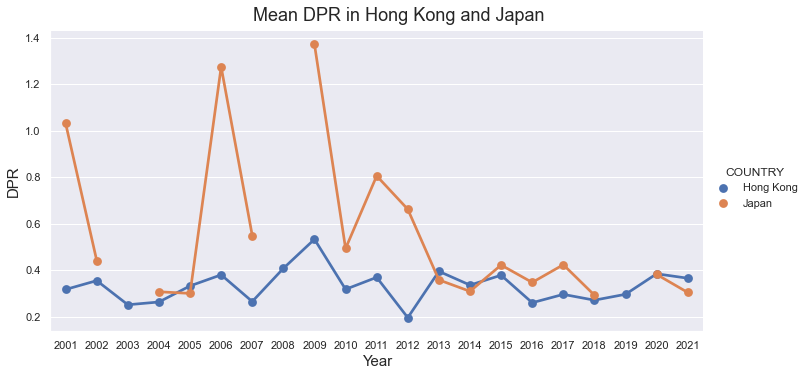

In [67]:
ax = sns.catplot(x="Year", y="DPR", hue="COUNTRY", kind="point", data=df_flat, height=5, 
    aspect=2); 

ax.fig.suptitle('Mean DPR in Hong Kong and Japan',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('DPR', fontsize=15);

In [68]:
plt.figure(figsize=(20,10))
df42=df5.groupby(['COUNTRY', 'Year']).median()

df_flat1 = df42.reset_index()
df_flat1.head()

,COUNTRY,Year,Tangibility,Market_to_book,Logsale,Profitability,DPR
0,Hong Kong,2001,0.321,0.896,6.963,0.050,-0.000
1,Hong Kong,2002,0.293,0.874,6.883,0.055,0.000
2,Hong Kong,2003,0.283,0.977,6.867,0.063,0.013
3,Hong Kong,2004,0.272,1.035,6.970,0.083,0.106
4,Hong Kong,2005,0.239,1.004,7.168,0.087,0.144


<Figure size 1440x720 with 0 Axes>

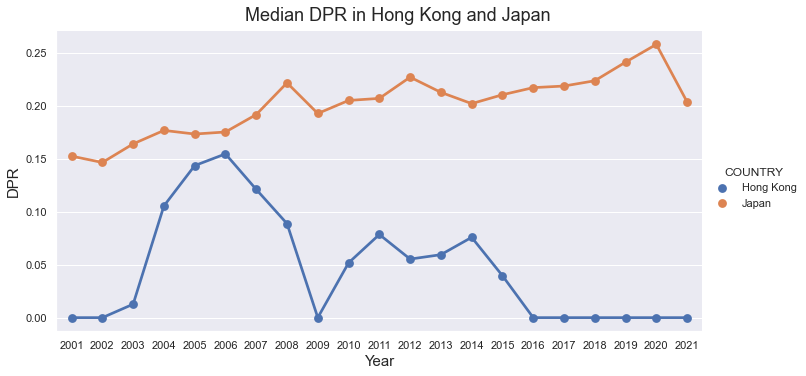

In [69]:
ax = sns.catplot(x="Year", y="DPR", hue="COUNTRY", kind="point", data=df_flat1, height=5, 
    aspect=2); 

ax.fig.suptitle('Median DPR in Hong Kong and Japan',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('DPR', fontsize=15);

#### Machine Learning

In [70]:
dfhk = df_hk1["DPR"]
dfhk

15000   0.107
15001   0.341
15002   0.351
15003   0.000
15004   1.145
         ... 
40439   0.178
40440   0.295
40441   0.379
40442   1.124
40443   0.580
Name: DPR, Length: 20991, dtype: float64

In [71]:
dfhk.describe().T

count   20991.000
mean        0.263
std         0.634
min        -1.156
25%         0.000
50%         0.000
75%         0.347
max         4.271
Name: DPR, dtype: float64

In [72]:
dfjp=df_jp1["DPR"]
dfjp.describe().T

count   74150.000
mean        0.293
std         0.635
min        -1.547
25%         0.000
50%         0.204
75%         0.370
max         4.250
Name: DPR, dtype: float64

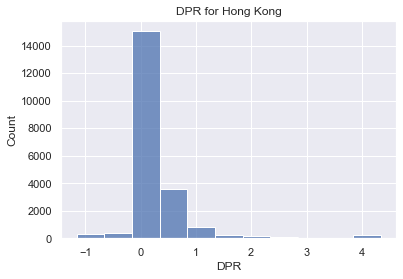

In [73]:
ax=sns.histplot(data=df_hk1, x ='DPR', binwidth=0.5).set(title="DPR for Hong Kong")
plt.show()

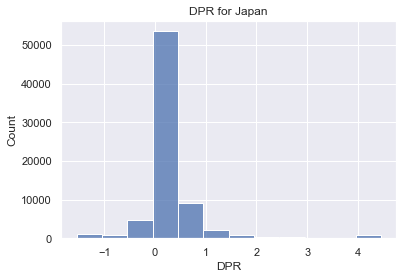

In [74]:
sns.histplot(data=df_jp1, x ='DPR', binwidth=0.5).set(title="DPR for Japan")
plt.show()

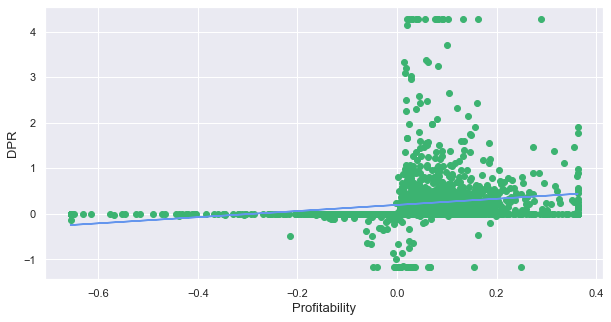

In [75]:
from sklearn.linear_model import LinearRegression

X = df_hk_2021["Profitability"].values.reshape(-1, 1)  
Y = df_hk_2021["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')

#plt.title('Profitability and DPR Hong Kong', fontsize=18);
plt.xlabel('Profitability', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

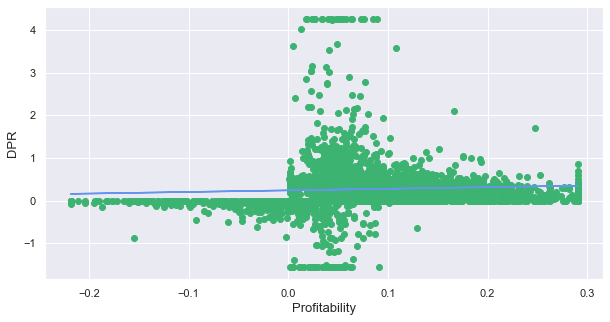

In [76]:
from sklearn.linear_model import LinearRegression

X = df_jp_2021["Profitability"].values.reshape(-1, 1)  
Y = df_jp_2021["DPR"].values.reshape(-1, 1)  

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')

#plt.title('Profitability and DPR Japan', fontsize=18);
plt.xlabel('Profitability', fontsize=13)
plt.ylabel('DPR', fontsize=13)
#plt.savefig('C:/Users/User/Desktop/regression_plot1.png')
plt.show()

In [77]:
df_hk['COUNTRY']=df_hk['COUNTRY'].map({'Hong Kong':1})
df_hk

,Tangibility,Market_to_book,Year,Logsale,Profitability,DPR,COUNTRY
15000,0.046,1.519,2001,7.260,0.164,0.107,1
15001,0.044,0.976,2002,7.492,0.106,0.341,1
15002,0.044,0.834,2003,7.557,0.070,0.351,1
15003,0.044,0.820,2004,7.688,0.068,0.000,1
15004,0.020,0.837,2005,7.814,0.034,1.145,1
...,...,...,...,...,...,...,...
40439,0.529,1.270,2017,7.879,0.091,0.178,1
40440,0.559,1.160,2018,7.904,0.064,0.295,1
40441,0.581,1.060,2019,7.973,0.102,0.379,1
40442,0.508,0.932,2020,8.082,0.023,1.124,1


In [78]:
X = df_hk.drop(['DPR'], axis=1)
y = df_hk['DPR']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE
# X_res,y_res = SMOTE().fit_resample(X,y)
train_X, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
# y = train_data['Y'].astype('int')
model = LinearRegression()
model.fit(train_X, train_y)
model

LinearRegression()

In [79]:
predicted_y = model.predict(test_x)

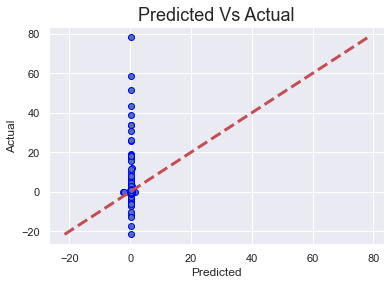

In [80]:
fig, ax = plt.subplots()
ax.scatter(predicted_y, test_y, edgecolors=(0, 0, 1))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predicted Vs Actual', fontsize=18)
plt.show()

In [81]:
# model evaluation for testing set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn  import metrics
from math import sqrt

mae = metrics.mean_absolute_error(test_y, predicted_y)
mse = metrics.mean_squared_error(test_y, predicted_y)
r2 = metrics.r2_score(test_y, predicted_y)

print("The model performance for testing set for Hong Kong")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set for Hong Kong
--------------------------------------
MAE is 0.5177725887739127
MSE is 6.0467929614799445
R2 score is 0.002047422795132814


In [82]:
rmse = sqrt(mean_squared_error(test_y,predicted_y))
print("The model performance for testing set for Hong Kong Formula 2")
print("The linear regression score on train data is {}".format(model.score(train_X,train_y)))
print("The linear regression score on test data is {}".format(model.score(test_x,test_y)))
print("The RMSE is {}".format(rmse))
print("The RMSE of the training set is {}".format(np.sqrt(metrics.mean_squared_error(test_y,predicted_y))))
print("The MAE is {}".format(metrics.mean_absolute_error(test_y,predicted_y)))
print("The MSE is {}".format(metrics.mean_squared_error(test_y,predicted_y)))
print("The R2 is {}".format(metrics.r2_score(test_y,predicted_y)))

The model performance for testing set for Hong Kong Formula 2
The linear regression score on train data is 0.0003824445946987165
The linear regression score on test data is 0.002047422795132814
The RMSE is 2.459022765547311
The RMSE of the training set is 2.459022765547311
The MAE is 0.5177725887739127
The MSE is 6.0467929614799445
The R2 is 0.002047422795132814


In [93]:
from IPython.display import IFrame
IFrame('https://help.coinbase.com/en', width=1000, height=650)